In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import pandas as pd
import numpy as np
from keras.applications.inception_v3 import InceptionV3 , preprocess_input
from keras.preprocessing import image
from scipy.spatial.distance import cdist

C:\Users\heret\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### TO DO
- Fix variable names (train/test)
- Clean up notebook

In [ ]:
model = InceptionV3(weights="imagenet", include_top=False)

In [102]:
root_path = "./street2shop/dummy_dataset_3"
img_paths = os.listdir(root_path)

In [203]:
# Inputs the images on the folder and returns the raw images and a normalised image tensor
def preprocess_img(img_paths, test=False): #read https://stackoverflow.com/questions/47555829/preprocess-input-method-in-keras
    if test==False:
        raw_imgs = [image.load_img(os.path.join(root_path, img_path), target_size=(250,250)) for img_path in img_paths]
        imgs = np.array([preprocess_input(np.expand_dims(image.img_to_array(img), axis=0)[0]) for img in raw_imgs])
    else:
        raw_imgs = image.load_img(os.path.join(root_path, img_paths), target_size=(250,250))
        imgs = np.array(preprocess_input(np.expand_dims(image.img_to_array(raw_imgs), axis=0)[0]))

    return raw_imgs, imgs

In [229]:
img_all_raw, img_all = preprocess_img(img_paths[173:])
img_target_raw, img_target = preprocess_img(img_paths[172], test=True)
img_target = np.expand_dims(img_target, axis=0)

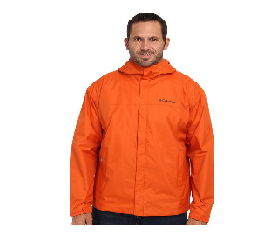

In [230]:
plt.imshow(img_target_raw)
plt.axis("off")
plt.show()

In [237]:
embeddings_train = np.array([model.predict(np.expand_dims(img, axis=0)).flatten() for img in img_all])

In [238]:
embedding_test = np.array([model.predict(np.expand_dims(img, axis=0)).flatten() for img in img_target])

In [239]:
distance = cdist(embeddings_train, embedding_test.reshape(1,-1), "cosine")
rank = np.argsort(distance.ravel())

## manually checked below:
# from numpy import vdot
# from numpy.linalg import norm

# def cosine_sim(a,b):
#     cos_sim = vdot(a, b)/(norm(a)*norm(b))
#     return cos_sim

# similarity_2 = []
# for n in range(len(embeddings_train)):
#     cos_sim_output = cosine_sim(embeddings_train[n].reshape(1,-1), embedding_test.reshape(1,-1))
#     similarity_2.append(cos_sim_output)

# similarity_2 = np.array(similarity_2).reshape(10,-1)
# rank_2 = np.argsort(similarity_2.ravel())

In [240]:
def show_image(ids, imgs, target_img):
    print("Target image:")
    plt.imshow(target_img) 
    plt.axis("off")
    plt.show()
    
    print("Top {} similar images".format(len(ids)))
    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(1, len(ids))
    for i in range(len(ids)):
        ax = fig.add_subplot(gs[0, i])
        ax.imshow(imgs[ids[i]])
        ax.axis("off")
    plt.show()

Target image:


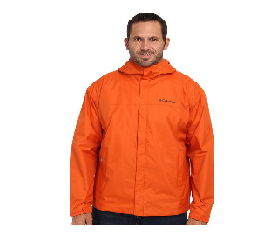

Top 10 similar images


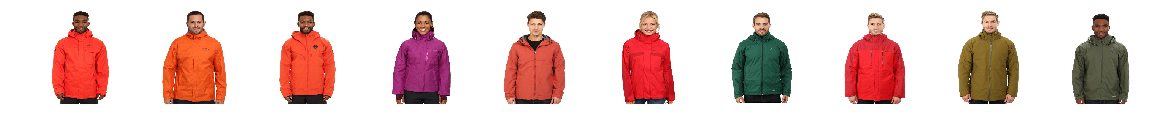

retrieved ids: [ 718    0  796  141 2820  594  291 1062  935   17]


In [241]:
n = 10
show_image(rank[0:10], img_all_raw, img_target_raw) #img 172
print("retrieved ids: {}".format(rank[:n]))

Target image:


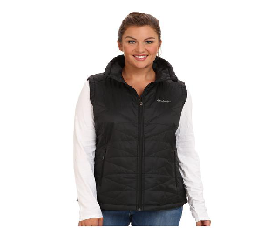

Top 10 similar images


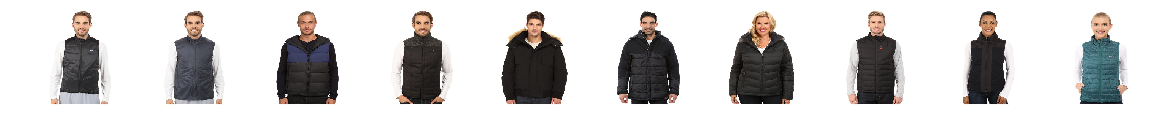

retrieved ids: [1844 1162 2027 1304 1968 1149  252 2193  820  536]


In [210]:
n = 10
show_image(rank[0:10], img_all_raw, img_target_raw) #img 65
print("retrieved ids: {}".format(rank[:n]))

Target image:


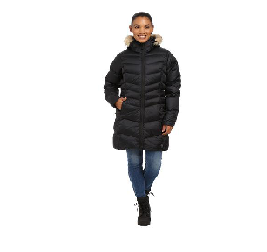

Top 10 similar images


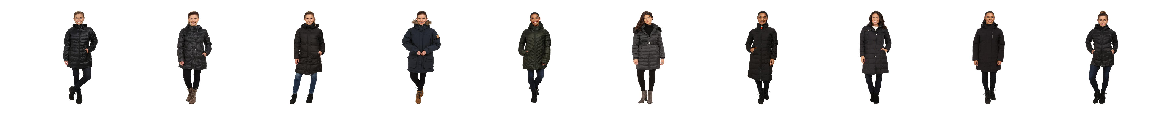

retrieved ids: [1114  435  831  206  423 2085 1793 2062  805 1372]


In [220]:
n = 10
show_image(rank[0:10], img_all_raw, img_target_raw) #img 21
print("retrieved ids: {}".format(rank[:n]))

Target image:


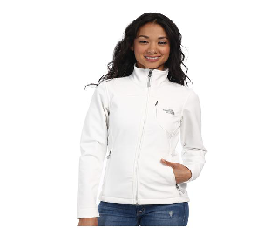

Top 10 similar images


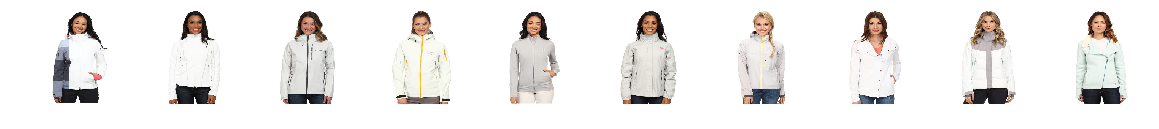

retrieved ids: [2259 2335   71  411 1818 1047  262  800 1834 2781]


In [228]:
n = 10
show_image(rank[0:10], img_all_raw, img_target_raw) #img 6
print("retrieved ids: {}".format(rank[:n]))